In [1]:
###### load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns

from scipy import stats # needed for ks test

from MAPseq_processing import * # import all functions from this script
from MAPseq_plotting import * # import all functions from this script

# needed for editable text in svg format
plt.rcParams['svg.fonttype'] = 'none'

# auto refreshes imported functions if source code changes:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
# import metadata
from M194_M220_metadata import *

# import colormaps
from colormaps import blue_cmp, orange_cmp
# specify blue/orange colors for qualitative intervals/data
blue_qual = [blue_cmp.colors[50], blue_cmp.colors[100], blue_cmp.colors[150], blue_cmp.colors[200], blue_cmp.colors[250]]
orange_qual = [orange_cmp.colors[36], orange_cmp.colors[72], orange_cmp.colors[108], orange_cmp.colors[144], orange_cmp.colors[180], orange_cmp.colors[216], orange_cmp.colors[252]]


In [3]:
# load data
# set-up paths
home_dir = '/Volumes/Data/'
# home_dir = "/mnt/labNAS/"


in_path = home_dir+'Emily/MAPseq/combined_analysis_M194_M220/processed_data/'
out_path = home_dir+'Emily/figures/fig_2_mapseq/figure_pics/'


# Load normalized count data - minimum intervention
with open(in_path + 'M194_M220_OMC_separate_all_count.pkl', 'rb') as f:
    omc_count = pickle.load(f)
    
with open(in_path + 'M194_M220_ACA_separate_all_count.pkl', 'rb') as f:
    aca_count = pickle.load(f)

with open(in_path + 'M194_M220_OMC_separate_all_countN.pkl', 'rb') as f:
    omc_countN = pickle.load(f)
    
with open(in_path + 'M194_M220_ACA_separate_all_countN.pkl', 'rb') as f:
    aca_countN = pickle.load(f)

In [6]:
plot_areas = ['AOMCi', 'POMCi','AOMCc', 'POMCc', 'AUD', 'STRd',
       'STRv', 'TH', 'HY', 'HIP', 'AMY', 'SNr', 'SCm', 'PG', 'APAGd', 'APAGv',
       'PPAGd', 'PPAGv', 'RN']
omc_countN_cdf, foo = dfs_to_cdf(omc_countN, plot_areas=plot_areas)
omc_countN_cdf

/Users/eisko/github_repos/MAPseq_analysis/MAPseq_processing.py:681: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_bc = pd.concat([all_bc, df])
/Users/eisko/github_repos/MAPseq_analysis/MAPseq_processing.py:711: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  cdf_df = pd.concat([cdf_df, int])


NO BARCODES, cannot compute ECDF for HIP STF3
NO BARCODES, cannot compute ECDF for PPAGd STF3


,x,cdf,mice,species,dataset,area
0,0.000016,0.000000,MMM1,MMus,M194,AOMCi
1,0.000016,0.000000,MMM1,MMus,M194,AOMCi
2,0.000016,0.000000,MMM1,MMus,M194,AOMCi
3,0.000016,0.000000,MMM1,MMus,M194,AOMCi
4,0.000016,0.000000,MMM1,MMus,M194,AOMCi
...,...,...,...,...,...,...
995,4.756320,0.988235,STM7,STeg,M220,RN
996,4.805947,0.988235,STM7,STeg,M220,RN
997,4.856092,0.988235,STM7,STeg,M220,RN
998,4.906761,0.988235,STM7,STeg,M220,RN


# Apply Batch correction

/Users/eisko/github_repos/MAPseq_analysis/MAPseq_processing.py:681: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_bc = pd.concat([all_bc, df])
/Users/eisko/github_repos/MAPseq_analysis/MAPseq_processing.py:711: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  cdf_df = pd.concat([cdf_df, int])


NO BARCODES, cannot compute ECDF for HIP STF3
NO BARCODES, cannot compute ECDF for PPAGd STF3


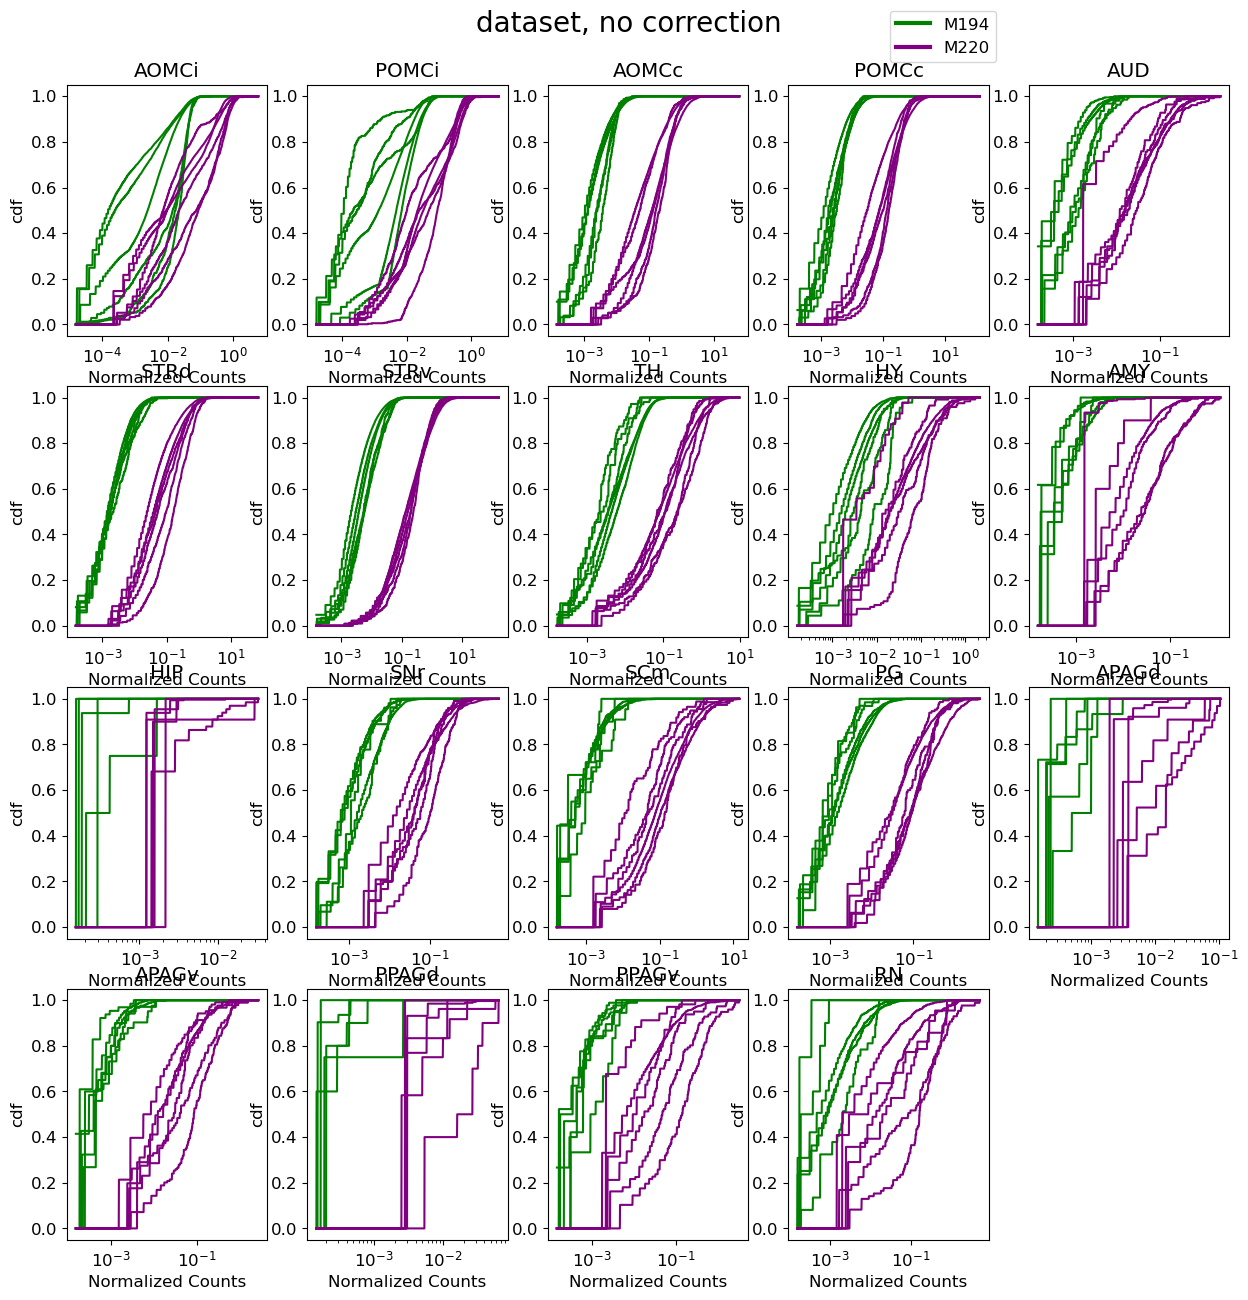

In [17]:
# Plot by dataset - no correction
to_plot = ['AOMCi', 'POMCi','AOMCc', 'POMCc', 'AUD', 'STRd',
       'STRv', 'TH', 'HY', 'AMY', 'HIP', 'SNr', 'SCm', 'PG', 'APAGd', 'APAGv',
       'PPAGd', 'PPAGv', 'RN']
fig1 = plot_cdf(omc_countN, plot_areas=to_plot, color_by="dataset", colors=["green", "purple"], 
                title="dataset, no correction", fig_size=(15,15))
plt.show()

In [18]:
# add injection site label to extract inj BC/neuron
for i in range(metadata.shape[0]):
    df = omc_countN[i]
    inj = df["AOMCi"] > df["POMCi"]
    inj = inj.replace({True:"AOMCi", False:"POMCi"})
    omc_countN[i]["inj_site"] = inj

omc_countN[0].drop(["inj_site"], axis=1)

,OB,AOMCi,POMCi,ACAi,AOMCc,POMCc,ACAc,AUD,STRd,STRv,...,SCm,PG,APAGd,APAGv,PPAGd,PPAGv,RN,L1_ctl,H2O_inj_ctl,H2O_targ_ctl
0,0.0,0.000000,0.001950,0.0,0.000000,0.000000,0.0,0.0,0.000159,0.001075,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000138,0.003990,0.0,0.002357,0.006801,0.0,0.0,0.011118,0.020885,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000020,0.005668,0.0,0.000181,0.000591,0.0,0.0,0.000318,0.003071,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.002539,0.0,0.001813,0.001478,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.012152,0.0,0.000000,0.000000,0.0,0.0,0.005241,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11739,0.0,0.000119,0.005940,0.0,0.000000,0.000296,0.0,0.0,0.000318,0.001536,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11740,0.0,0.000000,0.005668,0.0,0.000000,0.000296,0.0,0.0,0.000794,0.002764,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11741,0.0,0.005615,0.000091,0.0,0.000000,0.000887,0.0,0.0,0.000000,0.001229,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11742,0.0,0.000534,0.006711,0.0,0.000000,0.000296,0.0,0.0,0.001588,0.003532,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
# Calculate median BC to possibly use for batch correction (across all target regions)
targets = ['AOMCc', 'POMCc', 'ACAc', 'AUD', 'STRd',
       'STRv', 'TH', 'HY', 'AMY', 'HIP', 'SNr', 'SCm', 'PG', 'APAGd', 'APAGv',
       'PPAGd', 'PPAGv', 'RN']

medians = pd.DataFrame(columns=["AOMCi_med", "POMCi_med", "inj_med", "target_med", "all_med",
                                "mice", "species", "dataset"])


for i in range(metadata.shape[0]):
    df = omc_countN[i]

    # take nonzero median
    aomci_df = df[df['inj_site']=="AOMCi"]
    aomci = aomci_df["AOMCi"]
    aomci = aomci[aomci!=0]
    aomci_med = aomci.median()

    pomci_df = df[df['inj_site']=="POMCi"]
    pomci = pomci_df["POMCi"]
    pomci = pomci[pomci!=0]
    pomci_med = pomci.median()

    # combine AOMCi and POMCi countN for inj_med
    inj_bc = pd.concat([aomci, pomci])
    inj_med = inj_bc.median()

    # calculate median from just nonzero countN in target sites
    target_bcN = pd.Series(dtype="float64")
    
    for area in targets:
       area_bc = df[area]
       area_bc = area_bc[area_bc!=0]
       target_bcN = pd.concat([target_bcN, area_bc])

    # calculate median of nonzero countN across whole brain
    val_df = df.drop(["inj_site"], axis=1)
    vals = val_df.values.flatten()
    vals = vals[vals!=0]
    all_med = np.median(vals)
    
    target_med = target_bcN.median()

    row = [aomci_med, pomci_med, inj_med, target_med, all_med, 
           metadata.loc[i,"mice"], metadata.loc[i,"species"], metadata.loc[i,"dataset"]]

    medians.loc[i,:] = row

medians

,AOMCi_med,POMCi_med,inj_med,target_med,all_med,mice,species,dataset
0,0.007197,0.006575,0.006733,0.001943,0.002065,MMM1,MMus,M194
1,0.00629,0.005647,0.005953,0.001554,0.001568,MMF2,MMus,M194
2,0.011171,0.008818,0.009122,0.001858,0.00213,MMF3,MMus,M194
3,0.022893,0.023409,0.022905,0.002171,0.002253,STM1,STeg,M194
4,0.023799,0.017385,0.023192,0.002824,0.002676,STM2,STeg,M194
5,0.021982,0.013172,0.019628,0.00232,0.002359,STF3,STeg,M194
6,0.124483,0.116321,0.119496,0.052,0.042,MMM4,MMus,M220
7,0.083029,0.050412,0.058168,0.052189,0.037809,MMF5,MMus,M220
8,0.35396,0.213559,0.270012,0.05547,0.055879,STF4,STeg,M220
9,0.222513,0.225242,0.224694,0.108247,0.075486,STM5,STeg,M220


/Users/eisko/github_repos/MAPseq_analysis/MAPseq_processing.py:681: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_bc = pd.concat([all_bc, df])
/Users/eisko/github_repos/MAPseq_analysis/MAPseq_processing.py:711: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  cdf_df = pd.concat([cdf_df, int])


NO BARCODES, cannot compute ECDF for HIP STF3
NO BARCODES, cannot compute ECDF for PPAGd STF3


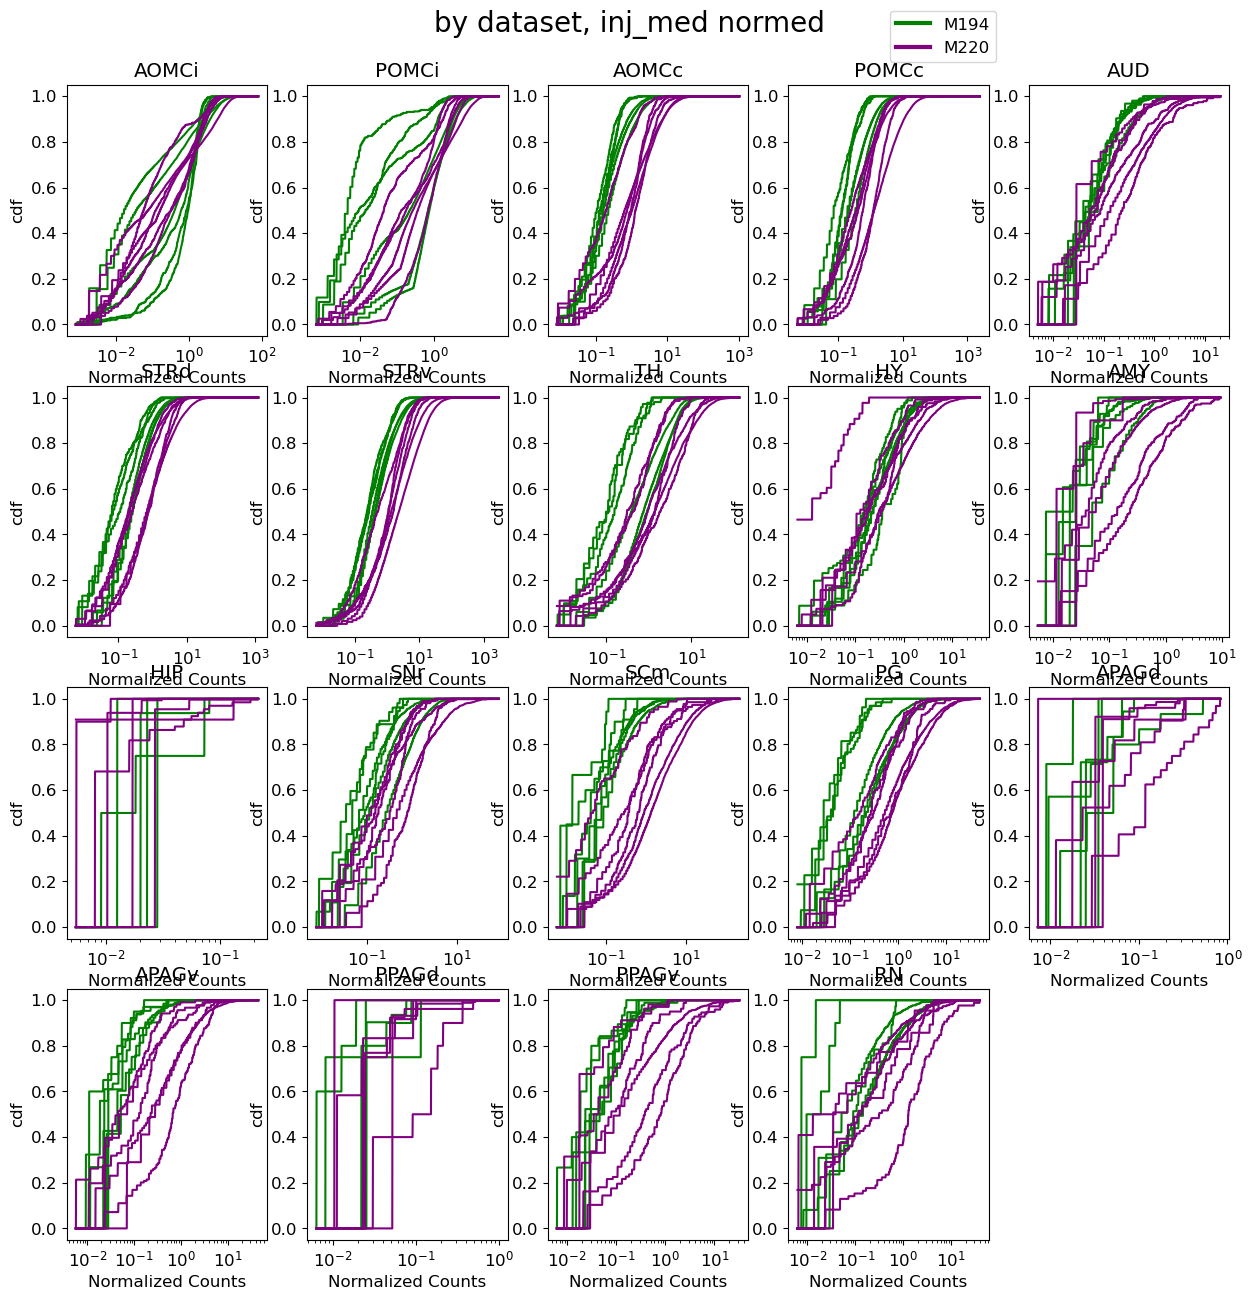

/Users/eisko/github_repos/MAPseq_analysis/MAPseq_processing.py:681: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_bc = pd.concat([all_bc, df])
/Users/eisko/github_repos/MAPseq_analysis/MAPseq_processing.py:711: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  cdf_df = pd.concat([cdf_df, int])


NO BARCODES, cannot compute ECDF for HIP STF3
NO BARCODES, cannot compute ECDF for PPAGd STF3


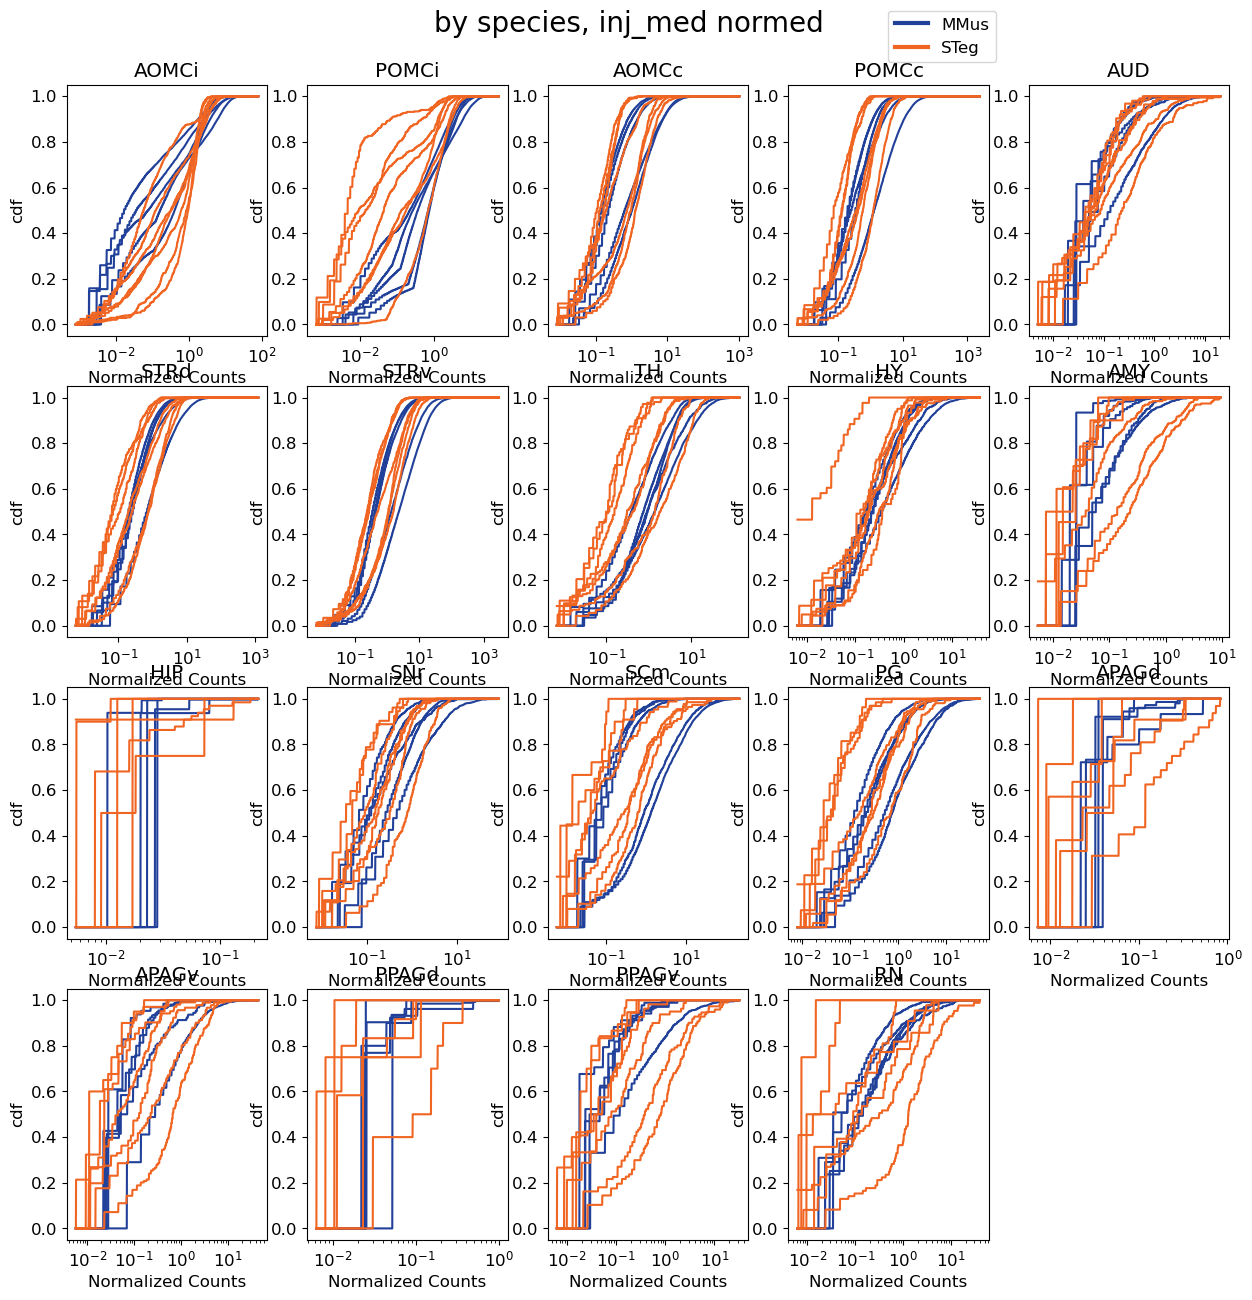

In [21]:
# normalize by inj_site median
omc_countN_med_inj = []
for i in range(len(omc_countN)):
    df = omc_countN[i].copy()
    df = df.drop(["inj_site"], axis=1)
    df_m = df/medians.loc[i, "inj_med"]
    omc_countN_med_inj.append(df_m)



plot_cdf(omc_countN_med_inj, plot_areas=to_plot, color_by="dataset", 
         colors=["green", "purple"], title="by dataset, inj_med normed",
         fig_size=(15,15))
plt.show()

plot_cdf(omc_countN_med_inj, plot_areas=to_plot, color_by="species",
         title="by species, inj_med normed", fig_size=(15,15))
plt.show()


/Users/eisko/github_repos/MAPseq_analysis/MAPseq_processing.py:681: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_bc = pd.concat([all_bc, df])
/Users/eisko/github_repos/MAPseq_analysis/MAPseq_processing.py:711: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  cdf_df = pd.concat([cdf_df, int])


NO BARCODES, cannot compute ECDF for HIP STF3
NO BARCODES, cannot compute ECDF for PPAGd STF3


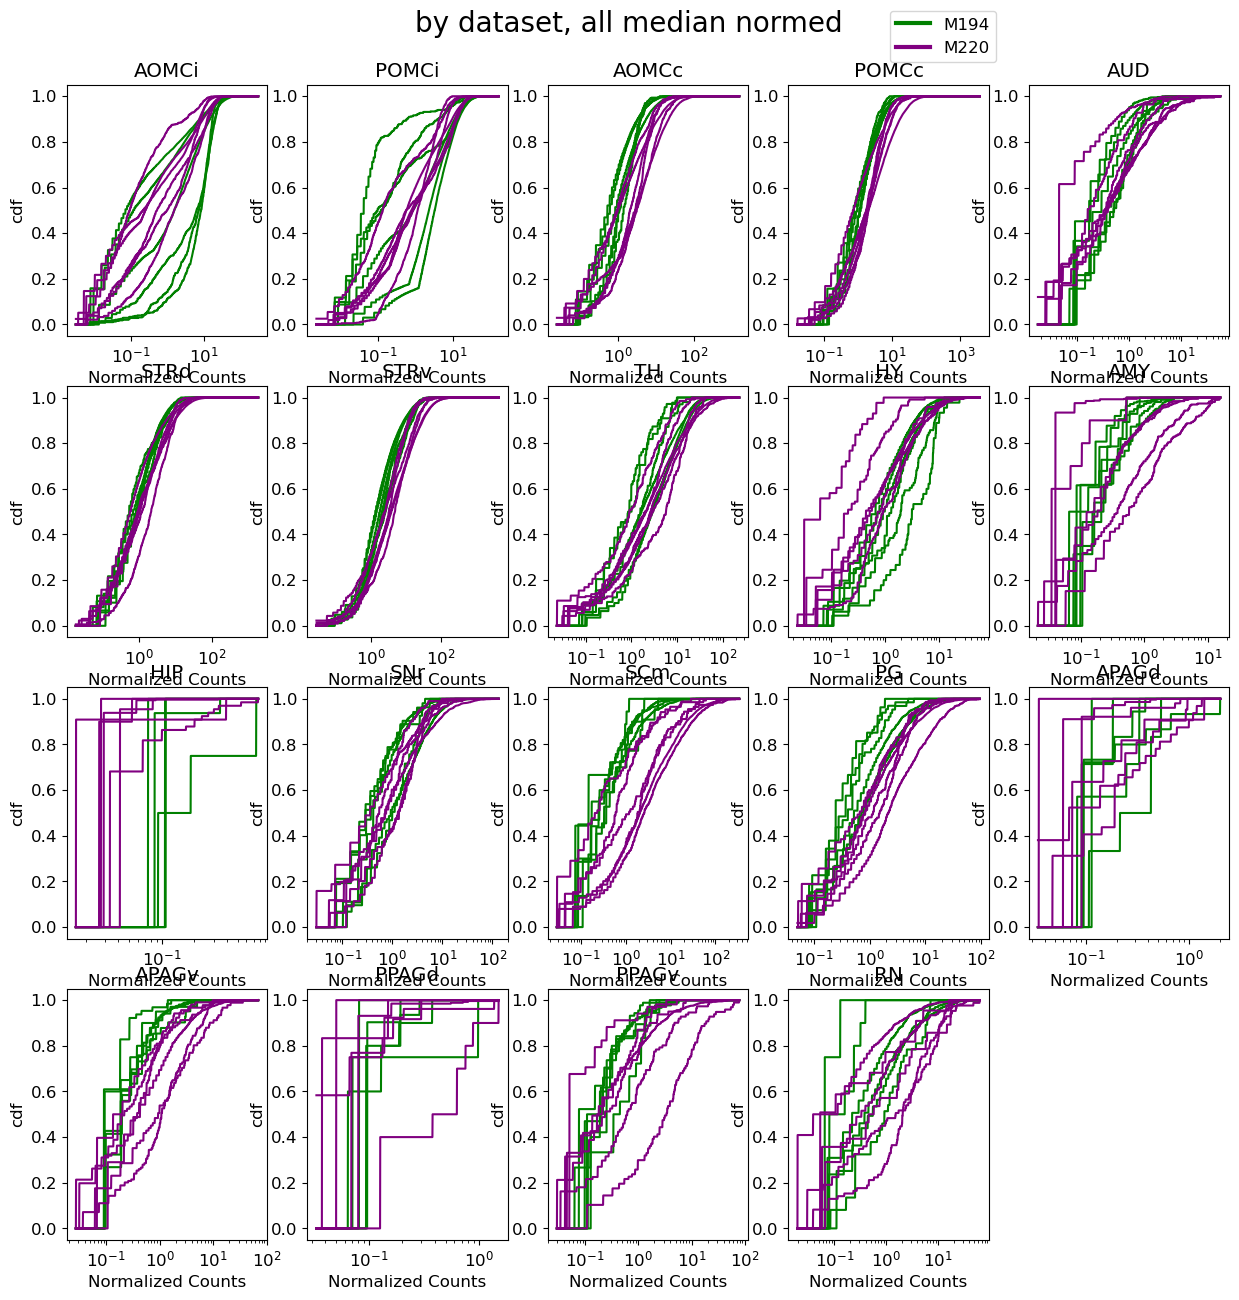

/Users/eisko/github_repos/MAPseq_analysis/MAPseq_processing.py:681: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_bc = pd.concat([all_bc, df])
/Users/eisko/github_repos/MAPseq_analysis/MAPseq_processing.py:711: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  cdf_df = pd.concat([cdf_df, int])


NO BARCODES, cannot compute ECDF for HIP STF3
NO BARCODES, cannot compute ECDF for PPAGd STF3


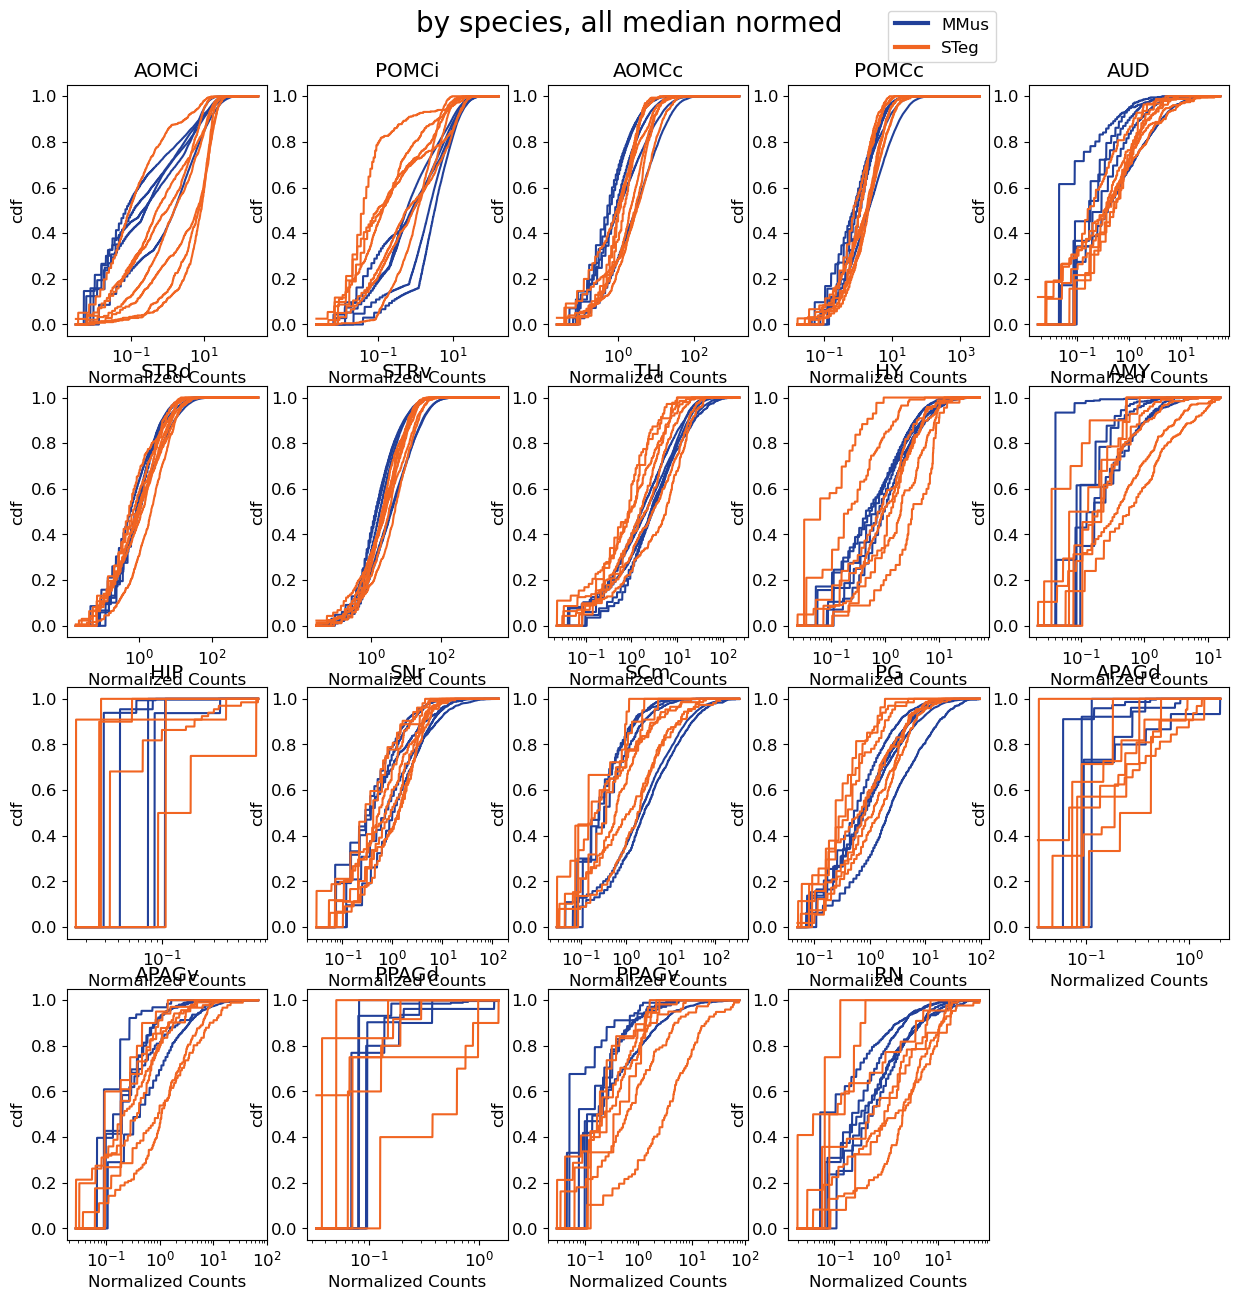

In [23]:
# normalize by all barcodes median
omc_countN_med = []
for i in range(len(omc_countN)):
    df = omc_countN[i].copy()
    df = df.drop(["inj_site"], axis=1)
    df_m = df/medians.loc[i, "all_med"]
    omc_countN_med.append(df_m)

fig3 = plot_cdf(omc_countN_med, plot_areas=to_plot, color_by="dataset", colors=["green", "purple"],
                title="by dataset, all median normed", fig_size=(15,15))
plt.show()

fig4 = plot_cdf(omc_countN_med, plot_areas=to_plot, color_by="species",
                title="by species, all median normed", fig_size=(15,15))
plt.show()



# figs for poster

In [25]:
# Calculate median BC to possibly use for batch correction (across all target regions)
targets = ['AOMCc', 'POMCc', 'ACAc', 'AUD', 'STRd',
       'STRv', 'TH', 'HY', 'AMY', 'HIP', 'SNr', 'SCm', 'PG', 'APAGd', 'APAGv',
       'PPAGd', 'PPAGv', 'RN']

medians = pd.DataFrame(columns=["AOMCi_med", "POMCi_med", "inj_med", "target_med", "all_med",
                                "mice", "species", "dataset"])


for i in range(metadata.shape[0]):
    df = omc_countN[i]

    # take nonzero median
    aomci_df = df[df['inj_site']=="AOMCi"]
    aomci = aomci_df["AOMCi"]
    aomci = aomci[aomci!=0]
    aomci_med = aomci.median()

    pomci_df = df[df['inj_site']=="POMCi"]
    pomci = pomci_df["POMCi"]
    pomci = pomci[pomci!=0]
    pomci_med = pomci.median()

    # combine AOMCi and POMCi countN for inj_med
    inj_bc = pd.concat([aomci, pomci])
    inj_med = inj_bc.median()

    # calculate median from just nonzero countN in target sites
    target_bcN = pd.Series(dtype="float64")
    
    for area in targets:
       area_bc = df[area]
       area_bc = area_bc[area_bc!=0]
       target_bcN = pd.concat([target_bcN, area_bc])

    # calculate median of nonzero countN across whole brain
    val_df = df.drop(["inj_site"], axis=1)
    vals = val_df.values.flatten()
    vals = vals[vals!=0]
    all_med = np.median(vals)
    
    target_med = target_bcN.median()

    row = [aomci_med, pomci_med, inj_med, target_med, all_med, 
           metadata.loc[i,"mice"], metadata.loc[i,"species"], metadata.loc[i,"dataset"]]

    medians.loc[i,:] = row

medians

,AOMCi_med,POMCi_med,inj_med,target_med,all_med,mice,species,dataset
0,0.007197,0.006575,0.006733,0.001943,0.002065,MMM1,MMus,M194
1,0.00629,0.005647,0.005953,0.001554,0.001568,MMF2,MMus,M194
2,0.011171,0.008818,0.009122,0.001858,0.00213,MMF3,MMus,M194
3,0.022893,0.023409,0.022905,0.002171,0.002253,STM1,STeg,M194
4,0.023799,0.017385,0.023192,0.002824,0.002676,STM2,STeg,M194
5,0.021982,0.013172,0.019628,0.00232,0.002359,STF3,STeg,M194
6,0.124483,0.116321,0.119496,0.052,0.042,MMM4,MMus,M220
7,0.083029,0.050412,0.058168,0.052189,0.037809,MMF5,MMus,M220
8,0.35396,0.213559,0.270012,0.05547,0.055879,STF4,STeg,M220
9,0.222513,0.225242,0.224694,0.108247,0.075486,STM5,STeg,M220


In [42]:
to_plot = ['OMCi', 'OMCc', 'AUD', 'STR', 'TH', 'HY', 'AMY', 'SNr', 
           'SCm', 'PG', 'PAG', 'RN']

# combine areas
omc_countN_comb = df_combine_areas(omc_countN)


# normalize by all barcodes median
omc_countN_med = []
for i in range(len(omc_countN_comb)):
    df = omc_countN_comb[i].copy()
    # df = df.drop(["inj_site"], axis=1)
    df_m = df/medians.loc[i, "all_med"]
    omc_countN_med.append(df_m)

# normalize by inj barcodes median
omc_countN_med_inj = []
for i in range(len(omc_countN_comb)):
    df = omc_countN_comb[i].copy()
    # df = df.drop(["inj_site"], axis=1)
    df_m = df/medians.loc[i, "inj_med"]
    omc_countN_med_inj.append(df_m)


In [14]:
# omc_countN_rename = [df.rename(columns={"AUD":"AUD/TEa"}) for df in omc_countN_med]
# omc_countN_rename[0]

,OMCi,OMCc,AUD/TEa,STR,TH,HY,AMY,PAG,SNr,SCm,PG,RN
0,0.944284,0.000000,0.0,0.597524,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.999520,4.435043,0.0,15.499149,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.754587,0.374204,0.0,1.641278,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.229765,1.594013,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.885303,0.000000,0.0,2.538462,6.135408,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11739,2.934227,0.143202,0.0,0.897562,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11740,2.745010,0.143202,0.0,1.723304,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11741,2.763513,0.429605,0.0,0.594973,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11742,3.508645,0.143202,0.0,2.479777,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


/Users/eisko/github_repos/MAPseq_analysis/MAPseq_processing.py:681: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_bc = pd.concat([all_bc, df])
/Users/eisko/github_repos/MAPseq_analysis/MAPseq_processing.py:711: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  cdf_df = pd.concat([cdf_df, int])


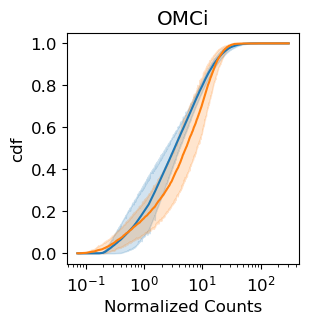

/Users/eisko/github_repos/MAPseq_analysis/MAPseq_processing.py:681: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_bc = pd.concat([all_bc, df])
/Users/eisko/github_repos/MAPseq_analysis/MAPseq_processing.py:711: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  cdf_df = pd.concat([cdf_df, int])


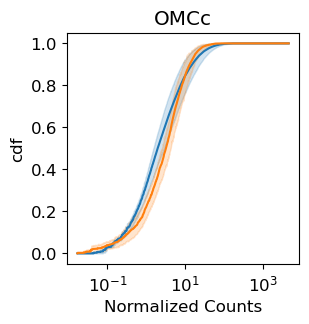

/Users/eisko/github_repos/MAPseq_analysis/MAPseq_processing.py:681: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_bc = pd.concat([all_bc, df])
/Users/eisko/github_repos/MAPseq_analysis/MAPseq_processing.py:711: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  cdf_df = pd.concat([cdf_df, int])


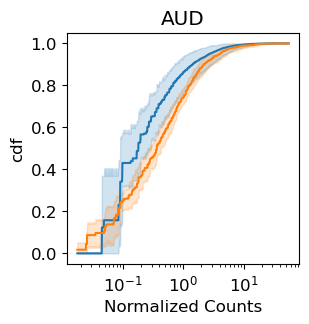

/Users/eisko/github_repos/MAPseq_analysis/MAPseq_processing.py:681: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_bc = pd.concat([all_bc, df])
/Users/eisko/github_repos/MAPseq_analysis/MAPseq_processing.py:711: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  cdf_df = pd.concat([cdf_df, int])


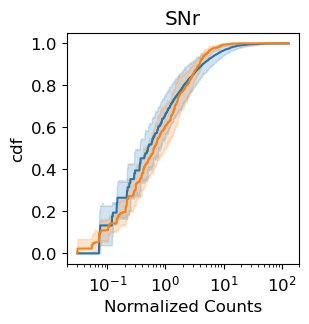

/Users/eisko/github_repos/MAPseq_analysis/MAPseq_processing.py:681: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_bc = pd.concat([all_bc, df])
/Users/eisko/github_repos/MAPseq_analysis/MAPseq_processing.py:711: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  cdf_df = pd.concat([cdf_df, int])


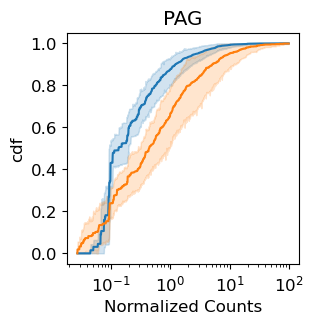

In [34]:
plot_ind = [["OMCi"], ["OMCc"], ["AUD"], ["SNr"], ["PAG"]]
labels = ["OMCi", "OMCc", "AUD", "SNr", "PAG"]

# plot OMCi, OMCc, AUD, PAG, SNr seperately
for i in range(len(plot_ind)):
    area = plot_ind[i]
    plot_cdf(omc_countN_med, plot_areas=area, color_by="species", title=None, legend=False, individual=False)
    plt.savefig(out_path+"cdf_comb_all_med_"+labels[i]+"_mean_ci95.svg", dpi=300, bbox_inches="tight")
    plt.show()


/Users/eisko/github_repos/MAPseq_analysis/MAPseq_processing.py:681: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_bc = pd.concat([all_bc, df])
/Users/eisko/github_repos/MAPseq_analysis/MAPseq_processing.py:711: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  cdf_df = pd.concat([cdf_df, int])
/Users/eisko/github_repos/MAPseq_analysis/MAPseq_plotting.py:427: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the s

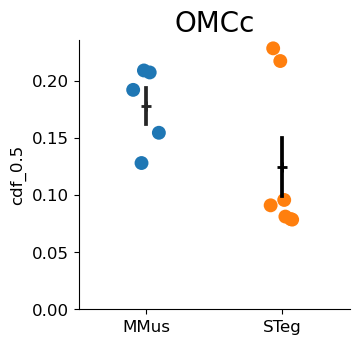

/Users/eisko/github_repos/MAPseq_analysis/MAPseq_plotting.py:427: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.pointplot(data=df, x="species", y=to_plot, hue="species", units='mice',


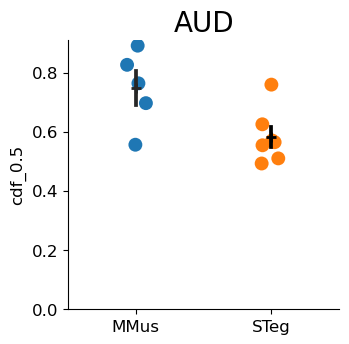

/Users/eisko/github_repos/MAPseq_analysis/MAPseq_plotting.py:427: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.pointplot(data=df, x="species", y=to_plot, hue="species", units='mice',


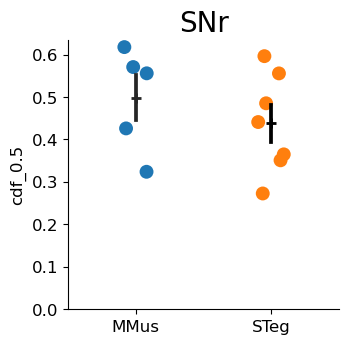

/Users/eisko/github_repos/MAPseq_analysis/MAPseq_plotting.py:427: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.pointplot(data=df, x="species", y=to_plot, hue="species", units='mice',


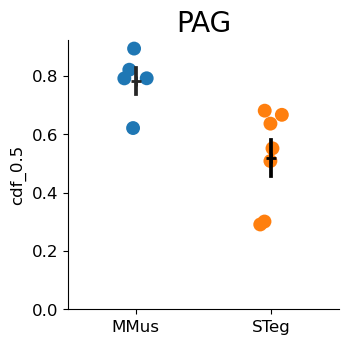

In [37]:
areas = ["OMCc", "AUD", "SNr", "PAG"]

cdf5_df = calc_cdf(omc_countN_med, plot_areas=areas, cdf_val=0.5)

for area in areas:
    dot_plot(cdf5_df, area=area, title=area, to_plot="cdf_0.5")
    plt.savefig(out_path+"cdf5_"+area+"dotplot.svg", dpi=300, bbox_inches="tight")
    plt.show()

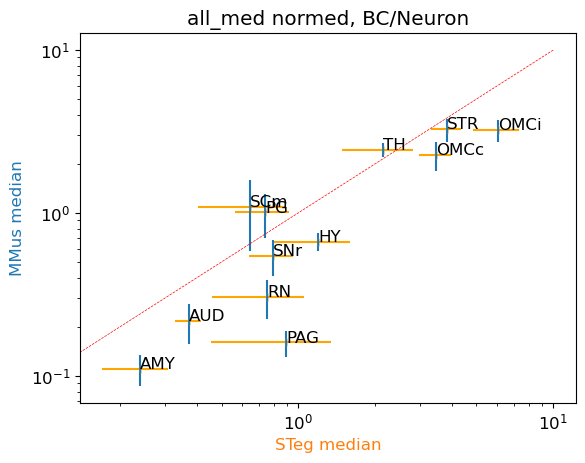

In [ ]:
# # scatter and volcano
# # normalize by all BC median


# # to_drop = ['OB', 'AOMCi', 'POMCi', 'ACAi', 'ACAc', 'HIP', 'L1_ctl', 'H2O_inj_ctl', 'H2O_targ_ctl']
# plot_med = dfs_to_medians(omc_countN_med, drop=[])
# stvmm_area_scatter(plot_med, to_plot="median", log=True, title="all_med normed, BC/Neuron", line_up_limit=10)
# plt.savefig(out_path+"scatter_comb_all_med.jpg", dpi=200, bbox_inches="tight")
# plt.show()


/Users/eisko/github_repos/MAPseq_analysis/MAPseq_processing.py:762: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  plot_df = pd.concat([plot_df, df_add])


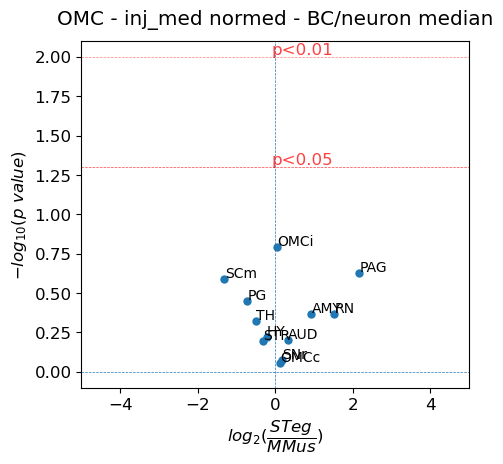

In [43]:

# volcano
plot_med = dfs_to_medians(omc_countN_med_inj, drop=[])
plot = proportion_ttest(plot_med, to_plot="median")
plot_volcano(plot, title="OMC - inj_med normed - BC/neuron median", xlim=(-5,5), legend_loc=None,
             fig_size=(5,4.5))

plt.savefig(out_path+"volcano_comb_inj_med.svg", dpi=200, bbox_inches="tight")
plt.show()

# scatter and volcano
- can only compare 2 samples at a time w/ KS
- decided to look at median per area so can compare across groups

## NO NORMALIZATION

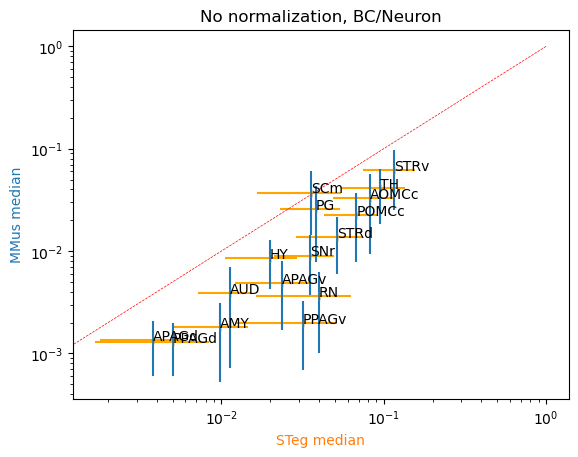

posx and posy should be finite values
posx and posy should be finite values


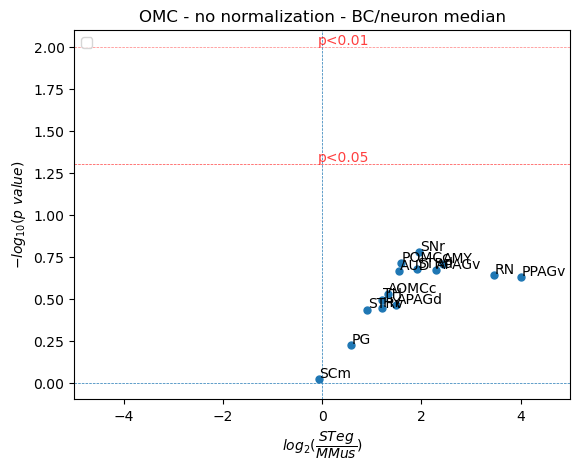

In [84]:
plot_med = dfs_to_medians(omc_countN)
stvmm_area_scatter(plot_med, to_plot="median", log=True, title="No normalization, BC/Neuron")
plt.show()

# volcano
plot = proportion_ttest(plot_med, to_plot="median")
plot_volcano(plot, title="OMC - no normalization - BC/neuron median", xlim=(-5,5))
plt.show()

## Median Normalized

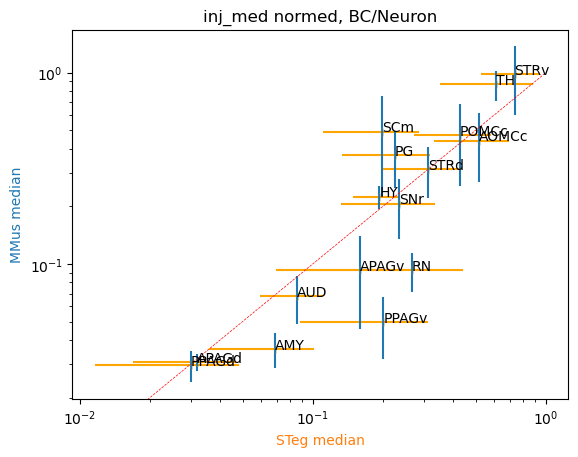

posx and posy should be finite values
posx and posy should be finite values


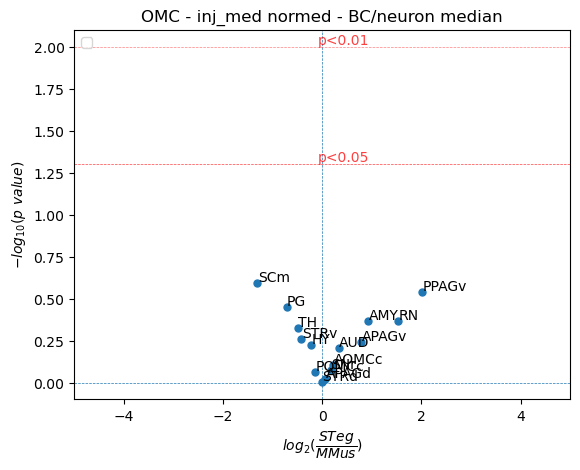

In [104]:
# normalize by inj_site median
omc_countN_med = []
for i in range(len(omc_countN)):
    df = omc_countN[i].copy()
    df = df.drop(["inj_site"], axis=1)
    df_m = df/medians.loc[i, "inj_med"]
    omc_countN_med.append(df_m)

to_drop = ['OB', 'AOMCi', 'POMCi', 'ACAi', 'ACAc', 'HIP', 'L1_ctl', 'H2O_inj_ctl', 'H2O_targ_ctl']
plot_med = dfs_to_medians(omc_countN_med, drop=to_drop)
stvmm_area_scatter(plot_med, to_plot="median", log=True, title="inj_med normed, BC/Neuron")
plt.show()

# volcano
plot = proportion_ttest(plot_med, to_plot="median")
plot_volcano(plot, title="OMC - inj_med normed - BC/neuron median", xlim=(-5,5))
plt.show()

## w/in dataset

In [90]:
m194 = []
m220 = []
for i in range(metadata.shape[0]):
    if metadata.loc[i,"dataset"]=="M194":
        m194.append(omc_countN[i])
    elif metadata.loc[i,"dataset"]=="M220":
        m220.append(omc_countN[i])

6

### M194

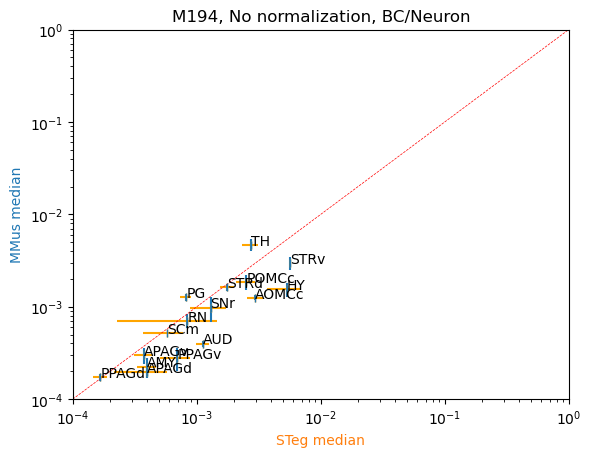

posx and posy should be finite values
posx and posy should be finite values


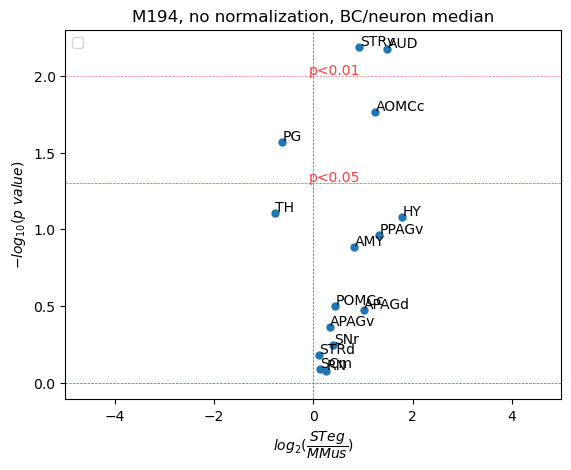

In [99]:
plot_med = dfs_to_medians(m194)
stvmm_area_scatter(plot_med, to_plot="median", log=True, title="M194, No normalization, BC/Neuron", 
                   ax_limits=(0.0001, 1))
plt.show()

# volcano
plot = proportion_ttest(plot_med, to_plot="median")
plot_volcano(plot, title="M194, no normalization, BC/neuron median", xlim=(-5,5))
plt.show()

### M220

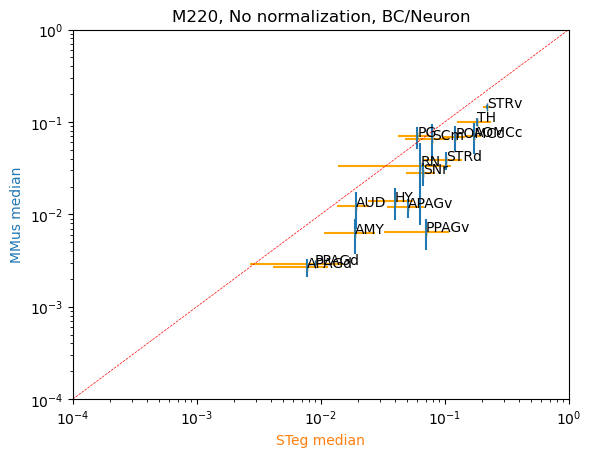

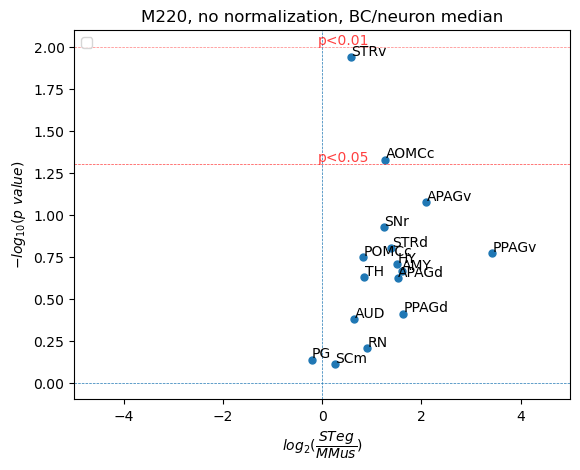

In [100]:
plot_med = dfs_to_medians(m220)
stvmm_area_scatter(plot_med, to_plot="median", log=True, title="M220, No normalization, BC/Neuron",
                   ax_limits=(0.0001, 1))
plt.show()

# volcano
plot = proportion_ttest(plot_med, to_plot="median")
plot_volcano(plot, title="M220, no normalization, BC/neuron median", xlim=(-5,5))
plt.show()